In [53]:
import tensorflow as tf 
import numpy as np
import sklearn

from tensorflow.keras import datasets, layers, models, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load dataset

In [34]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Normalize pixel values to be between [0,1]

In [35]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Split training into training and validation set

In [36]:
# Define the split index
split_index = int(0.8 * len(train_images))  # 80% of 60000 = 48000

# Split images and labels
train_images, val_images = train_images[:split_index], train_images[split_index:]
train_labels, val_labels = train_labels[:split_index], train_labels[split_index:]

### Verify data

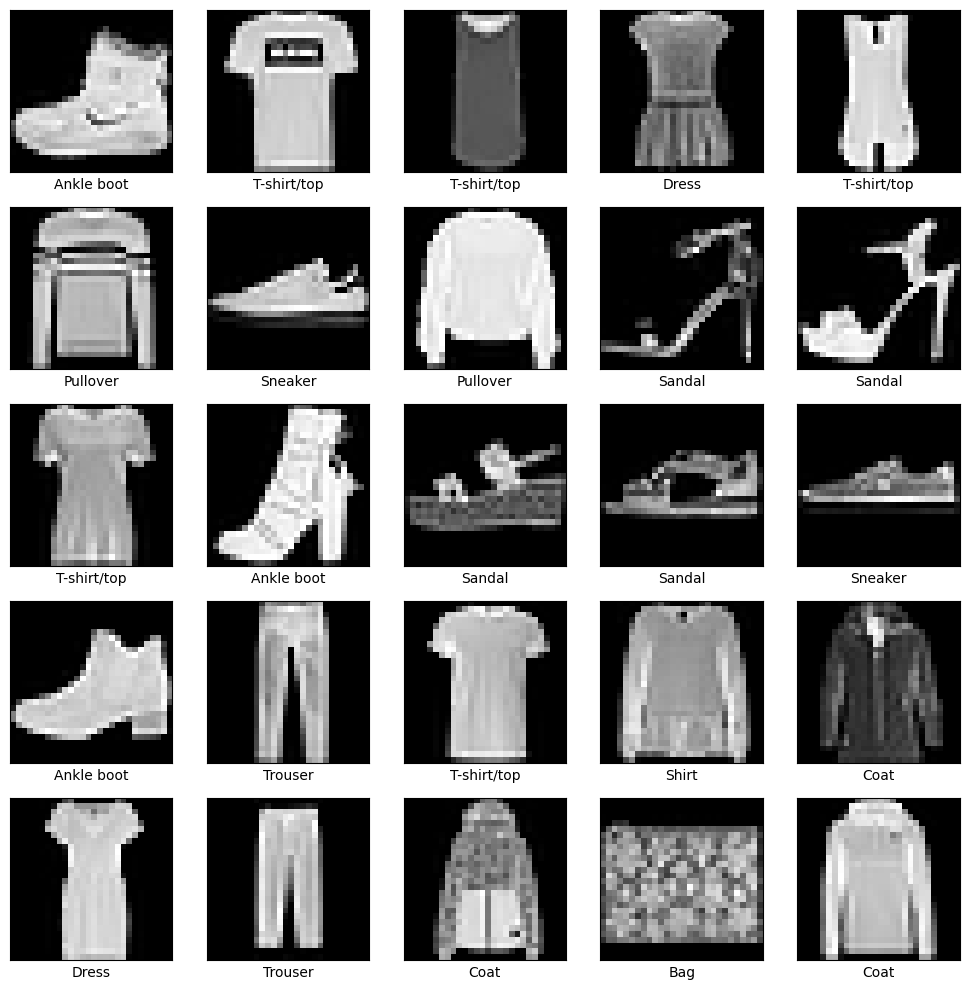

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')  # grayscale colormap
    plt.xlabel(class_names[train_labels[i]])  # no [0] needed
plt.tight_layout()
plt.show()

### Convolutional base

In [44]:
model_basic = models.Sequential()
model_basic.add(Input(shape=(28, 28, 1)))
model_basic.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_basic.add(layers.MaxPooling2D((2, 2)))
model_basic.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_basic.add(layers.MaxPooling2D((2, 2)))
model_basic.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Model Arch

In [45]:
model_basic.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

### Add Dense Layers

In [46]:
model_basic.add(layers.Flatten())
model_basic.add(layers.Dense(64, activation='relu'))
model_basic.add(layers.Dense(10))

### Train the model

In [47]:
model_basic.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_basic = model_basic.fit(train_images, train_labels, 
                    epochs=10, 
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7341 - loss: 0.7333 - val_accuracy: 0.8712 - val_loss: 0.3640
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8744 - loss: 0.3461 - val_accuracy: 0.8852 - val_loss: 0.3128
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8932 - loss: 0.2873 - val_accuracy: 0.8917 - val_loss: 0.2958
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9095 - loss: 0.2469 - val_accuracy: 0.8982 - val_loss: 0.2902
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9115 - loss: 0.2335 - val_accuracy: 0.9007 - val_loss: 0.2714
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9228 - loss: 0.2051 - val_accuracy: 0.8988 - val_loss: 0.2797
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9307 - loss: 0.1859 - val_accuracy: 0.9078 - val_loss: 0.2570
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9392 -

### Plot the baseline model's loss

313/313 - 1s - 4ms/step - accuracy: 0.9075 - loss: 0.2621
0.9075000286102295


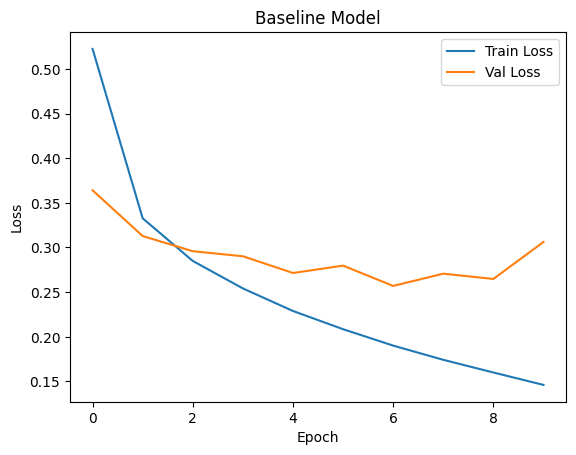

In [64]:
plt.plot(history_basic.history['loss'], label='Train Loss')
plt.plot(history_basic.history['val_loss'], label='Val Loss')
plt.title('Baseline Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc_basic = model_basic.evaluate(test_images,  test_labels, verbose=2)

print(test_acc_basic)

### Confusion Matrix for Baseline Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


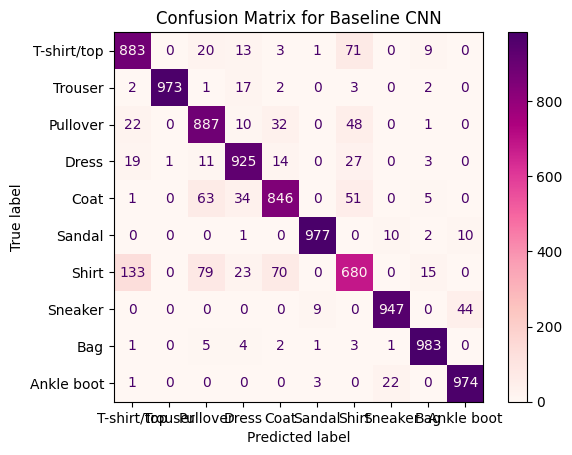

In [57]:
# Step 1: Get predictions from your model
logits = model_basic.predict(test_images)
probs = tf.nn.softmax(logits).numpy()
pred_labels = np.argmax(probs, axis=1)

# Step 2: Create confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Step 3: Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title("Confusion Matrix for Baseline CNN")
plt.show()

### Model 2 - Batch Normalization

In [60]:
# CNN with Batch normalization
model_BN = models.Sequential([
    # Input shape
    Input(shape=(28, 28, 1)),
    
    # First Conv Block
    layers.Conv2D(64, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second Conv Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Conv Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# compile model_BN 
model_BN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train model_BN
history_BN = model2.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[early_stop]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9646 - loss: 0.0985 - val_accuracy: 0.9227 - val_loss: 0.2709
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 58ms/step - accuracy: 0.9659 - loss: 0.0910 - val_accuracy: 0.9153 - val_loss: 0.2683
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 54ms/step - accuracy: 0.9688 - loss: 0.0843 - val_accuracy: 0.9221 - val_loss: 0.2611
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 58ms/step - accuracy: 0.9722 - loss: 0.0757 - val_accuracy: 0.9193 - val_loss: 0.3252
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 54ms/step - accuracy: 0.9744 - loss: 0.0691 - val_accuracy: 0.9058 - val_loss: 0.3388
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 56ms/step - accuracy: 0.9752 - loss: 0.0663 - val_accuracy: 0.9222 - val_loss: 0.2869


In [84]:
model_BN.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,770 (1.43 MB)

 Trainable params: 372,874 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

313/313 - 5s - 15ms/step - accuracy: 0.9197 - loss: 0.2782
0.919700026512146


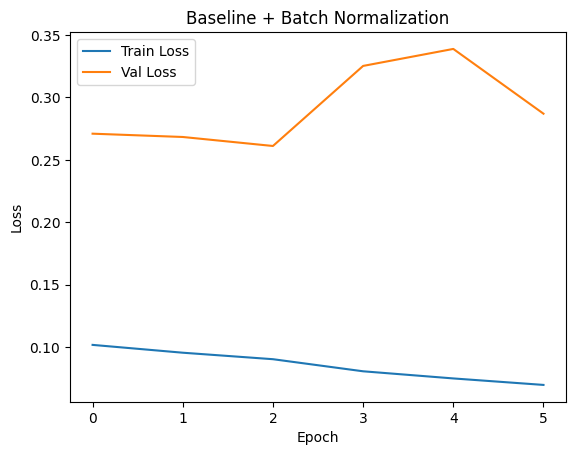

In [63]:
plt.plot(history_BN.history['loss'], label='Train Loss')
plt.plot(history_BN.history['val_loss'], label='Val Loss')
plt.title('Baseline + Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc_BN = model2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc_BN)

### Confusion Matrix for Baseline Model with Batch Normalization

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


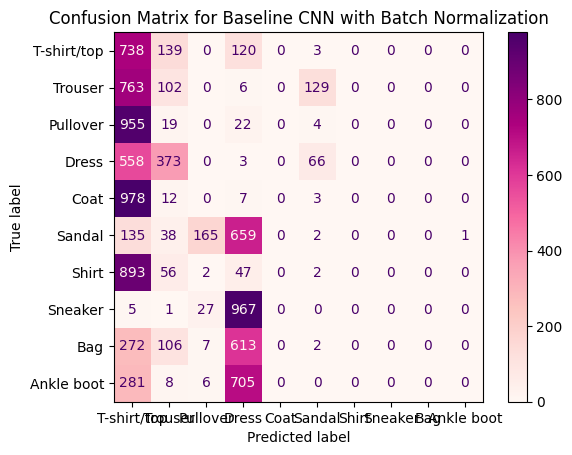

In [75]:
# Step 1: Get predictions from your model
logits_BN = model_BN.predict(test_images)
probs_BN = tf.nn.softmax(logits_BN).numpy()
pred_labels_BN = np.argmax(probs_BN, axis=1)

# Step 2: Create confusion matrix
cm_BN = confusion_matrix(test_labels, pred_labels_BN)

# Step 3: Display it
disp_BN = ConfusionMatrixDisplay(confusion_matrix=cm_BN, display_labels=class_names)
disp_BN.plot(cmap='RdPu')
plt.title("Confusion Matrix for Baseline CNN with Batch Normalization")
plt.show()

### Model 3 - Global Average Pooling

In [67]:
model_gap = models.Sequential([
    # Input shape
    Input(shape=(28, 28, 1)),
    
    # Conv Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Conv Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Conv Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Use Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_gap.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_gap = model3.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[early_stop]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.8833 - loss: 0.3331 - val_accuracy: 0.8800 - val_loss: 0.3216
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9006 - loss: 0.2795 - val_accuracy: 0.8735 - val_loss: 0.3379
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9093 - loss: 0.2572 - val_accuracy: 0.8092 - val_loss: 0.5353
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9179 - loss: 0.2278 - val_accuracy: 0.8999 - val_loss: 0.2734
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9249 - loss: 0.2041 - val_accuracy: 0.9108 - val_loss: 0.2498
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9323 - loss: 0.1916 - val_accuracy: 0.8951 - val_loss: 0.3089
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9365 - loss: 0.1770 - val_accuracy: 0.8335 - val_loss: 0.6267
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9379 -

In [85]:
model_gap.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,474 (400.29 KB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 448 (1.75 KB)

313/313 - 2s - 8ms/step - accuracy: 0.9141 - loss: 0.2387
0.9140999913215637


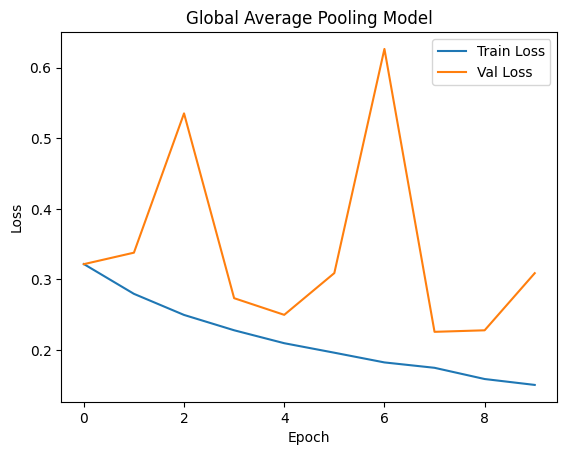

In [69]:
plt.plot(history_gap.history['loss'], label='Train Loss')
plt.plot(history_gap.history['val_loss'], label='Val Loss')
plt.title('Global Average Pooling Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc_gap = model3.evaluate(test_images,  test_labels, verbose=2)
print(test_acc_gap)

### Confusion Matrix for Model with Global Average Pooling

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


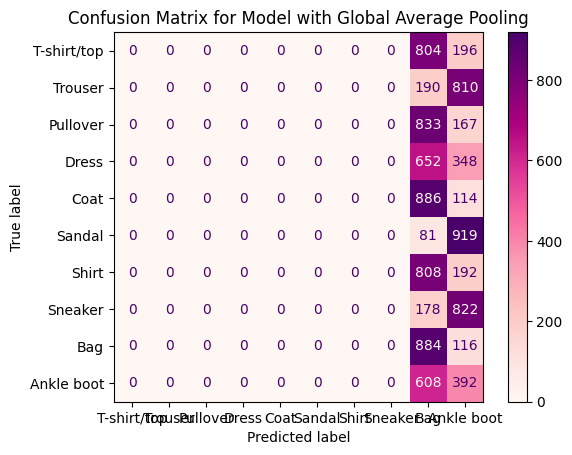

In [76]:
# Step 1: Get predictions from your model
logits_gap = model_gap.predict(test_images)
probs_gap = tf.nn.softmax(logits_gap).numpy()
pred_labels_gap = np.argmax(probs_gap, axis=1)

# Step 2: Create confusion matrix
cm_gap = confusion_matrix(test_labels, pred_labels_gap)

# Step 3: Display it
disp_gap = ConfusionMatrixDisplay(confusion_matrix=cm_gap, display_labels=class_names)
disp_gap.plot(cmap='RdPu')
plt.title("Confusion Matrix for Model with Global Average Pooling")
plt.show()

### Improve Batch Normalization model

In [77]:
# CNN with tweaks to Batch normalization -> reducing num of filters and adding dropout after flatten
model_BN_v2 = models.Sequential([
    # Input shape
    Input(shape=(28, 28, 1)),
    
    # First Conv Block
    layers.Conv2D(32, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second Conv Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Conv Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# compile model_BN 
model_BN_v2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train model_BN
history_BN_v2 = model_BN_v2.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[early_stop]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.7529 - loss: 0.7027 - val_accuracy: 0.8656 - val_loss: 0.3638
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8669 - loss: 0.3643 - val_accuracy: 0.8660 - val_loss: 0.3371
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8872 - loss: 0.3152 - val_accuracy: 0.8995 - val_loss: 0.2666
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8960 - loss: 0.2886 - val_accuracy: 0.9081 - val_loss: 0.2543
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9038 - loss: 0.2657 - val_accuracy: 0.9156 - val_loss: 0.2293
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9102 - loss: 0.2476 - val_accuracy: 0.9180 - val_loss: 0.2305
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9137 - loss: 0.2368 - val_accuracy: 0.9075 - val_loss: 0.2531
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9169 -

In [86]:
model_BN_v2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 728,992 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 485,526 (1.85 MB)

313/313 - 2s - 8ms/step - accuracy: 0.9173 - loss: 0.2276
0.9172999858856201


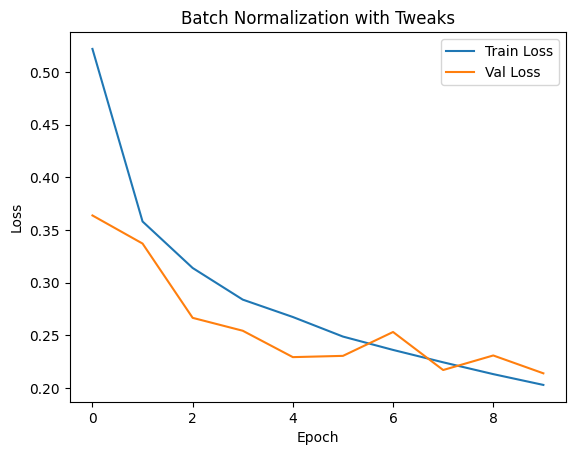

In [80]:
plt.plot(history_BN_v2.history['loss'], label='Train Loss')
plt.plot(history_BN_v2.history['val_loss'], label='Val Loss')
plt.title('Batch Normalization with Tweaks')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

test_loss, test_acc_BN_v2 = model_BN_v2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc_BN_v2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


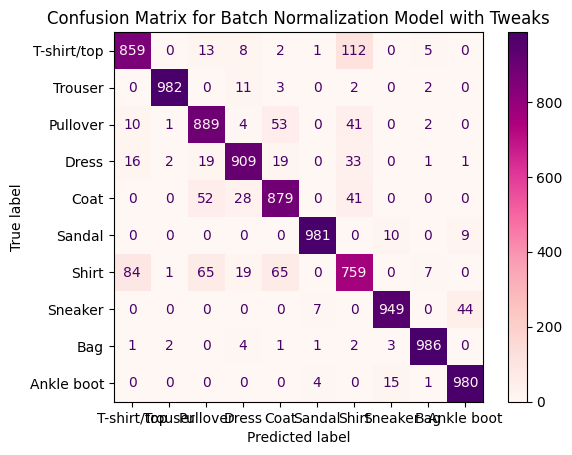

In [82]:
# Step 1: Get predictions from your model
logits_BN_v2 = model_BN_v2.predict(test_images)
probs_BN_v2 = tf.nn.softmax(logits_BN_v2).numpy()
pred_labels_BN_v2 = np.argmax(probs_BN_v2, axis=1)

# Step 2: Create confusion matrix
cm_BN_v2 = confusion_matrix(test_labels, pred_labels_BN_v2)

# Step 3: Display it
disp_BN_v2 = ConfusionMatrixDisplay(confusion_matrix=cm_BN_v2, display_labels=class_names)
disp_BN_v2.plot(cmap='RdPu')
plt.title("Confusion Matrix for Batch Normalization Model with Tweaks")
plt.show()